# Лабораторная работа №2. Визуальный анализ данных
### <a href="https://archive.ics.uci.edu/dataset/863/maternal+health+risk">Беременность с высоким риском</a>

### Описание набора данных:
Данные были собраны в различных больницах, общественных клиниках и учреждениях охраны материнства в сельских районах Бангладеш с помощью системы мониторинга рисков, основанной на IoT*.
<h1></h1><i>IoT - https://en.wikipedia.org/wiki/Internet_of_things</i>

### Прилогающаяся информация:
Возраст, систолическое артериальное давление - систолическое АД, диастолическое АД - диастолическое АД, уровень сахара в крови - BS, Температура тела - Bottom Temperature, частота сердечных сокращений и уровень риска. Все это является ответственными и значимыми факторами риска материнской смертности, что является одной из главных задач ЦУР ООН.

### Назначение набора данных и возможные модели:
1) Age -	<b>Integer</b> - Целое - <b>(adviser, amdahl, apollo, ..., siemens, wang)</b>
2) SystolicBP - <b>Integer</b> - Целое - <b>Upper value of Blood Pressure in mmHg</b> - Верхнее артериальное давление в мм. рт.
3) DiastolicBP - <b>Integer</b> - Целое - <b>Lower value of Blood Pressure in mmHg</b> - Нижнее артериальное давление в мм. рт.
4) BS - <b>Integer</b> - Целое - <b>Blood glucose levels is in terms of a molar concentration</b> - Уровень глюкозы в крови определяется в виде молярной концентрации
5) BodyTemp - <b>Integer</b> - Целое - <b>A temperature setpoint is the level at which the body attempts to maintain its temperature</b> - Заданное значение температуры - это уровень, при котором организм пытается поддерживать свою 
6) HeartRate - <b>Integer</b> - Целое - <b>A normal resting heart rate	bpm	</b> - количество килобайт кэш-памяти
7) RiskLevel - <b>Categorical</b> - Категоральное - <b>Predicted Risk Intensity Level during pregnancy considering the previous attribute</b> - Прогнозируемый уровень интенсивности риска во время беременности с учетом предыдущего признака

Подключение библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = "Maternal_Health_Risk_Data_Set.csv"
data = pd.read_csv(data_path)
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

## Работа с pandas

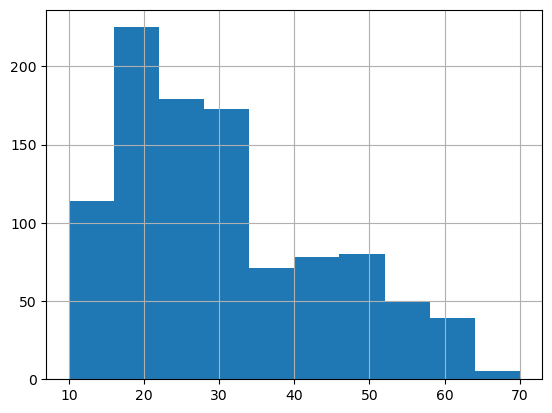

In [5]:
data['Age'].hist();

Построение диаграммы типа "ящик с усами".
</p>По этой диаграмме можно определить медиану, квартили, интерквартильный размах, выбросы

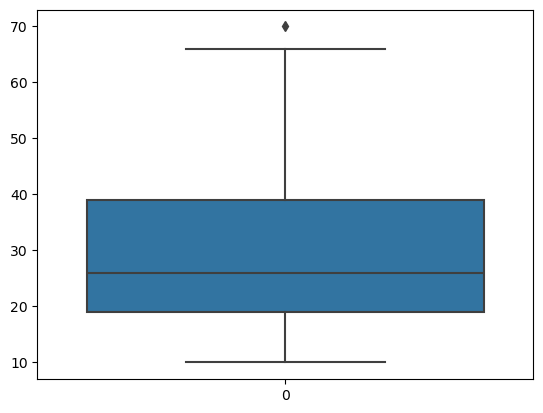

In [12]:
sns.boxplot(data['Age']);

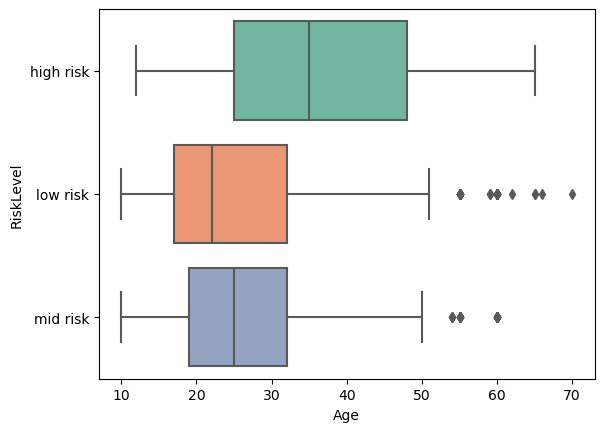

In [10]:
top_data = data[['RiskLevel','Age']]
top_data = top_data.groupby('RiskLevel').sum()
top_data = top_data.sort_values('Age',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='RiskLevel', 
            x='Age', 
            data=data[data.RiskLevel.isin(top_data)], palette='Set2');

Изходя из графика, видно, что наибольшему риску подвержены женщины в районе 34 лет, в то вермя как 23 является самым безопасным возрастом для родов.

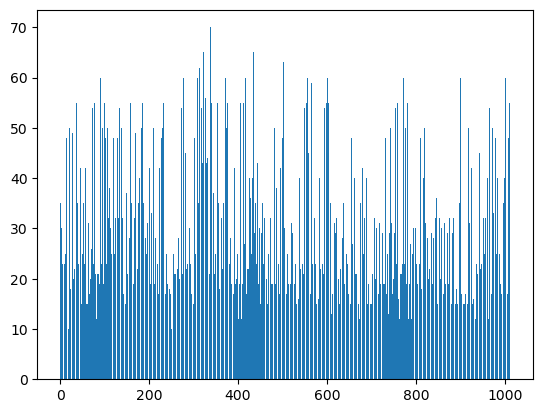

In [13]:
plt.bar(data.index, data['Age'])
plt.show()

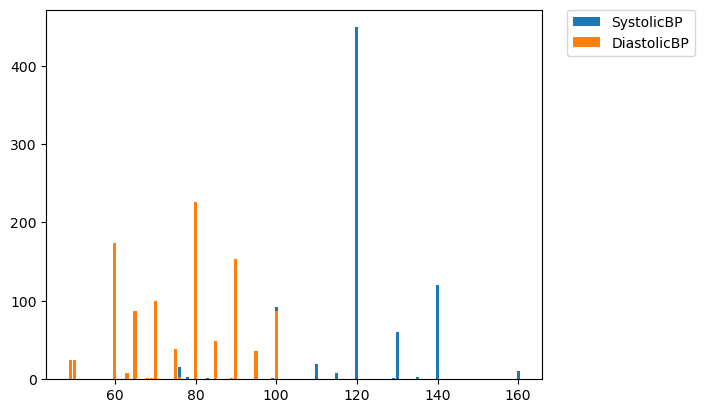

In [33]:
hist = data['SystolicBP'].value_counts()
plt.bar(hist.index, hist, label='SystolicBP' );
hist = data['DiastolicBP'].value_counts()
plt.bar(hist.index, hist, label='DiastolicBP');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Отбор признаков

In [34]:
feats=[f for f in data.columns if 'BP' in f]
feats

['SystolicBP', 'DiastolicBP']

Гистограммы с отборами признаками

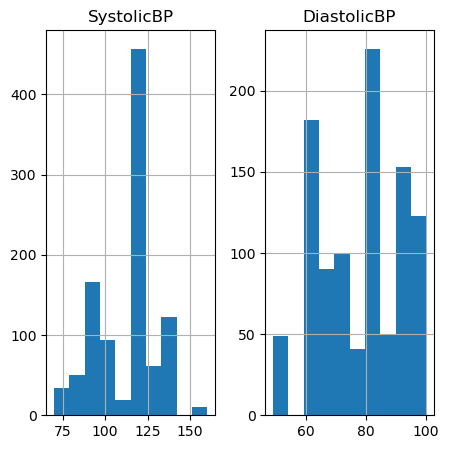

In [35]:
data[feats].hist(figsize=(5,5));

График показывает, что в данном наборе данных, верхнее кровенное давление в основном находится на отметке 120 миллиметров ртутного столба, в то время, как нижнее распределилось более плавно в районе от 60 до 100 миллиметров ртутного столба.

In [37]:
data['Age'].value_counts()

Age
23    71
19    67
17    63
15    60
35    50
25    48
32    48
22    45
50    43
29    40
21    38
40    37
55    37
12    35
60    34
30    30
28    28
48    26
42    23
20    22
31    22
18    19
16    16
54    12
13    12
27     9
49     9
45     9
37     6
33     5
34     5
43     5
10     4
36     4
39     4
24     3
65     3
44     3
14     3
26     3
63     2
38     2
59     2
62     1
51     1
66     1
56     1
70     1
41     1
46     1
Name: count, dtype: int64

Гистограммы возроста женщены в период беременности и первые 7 результатов

<Axes: xlabel='Age', ylabel='count'>

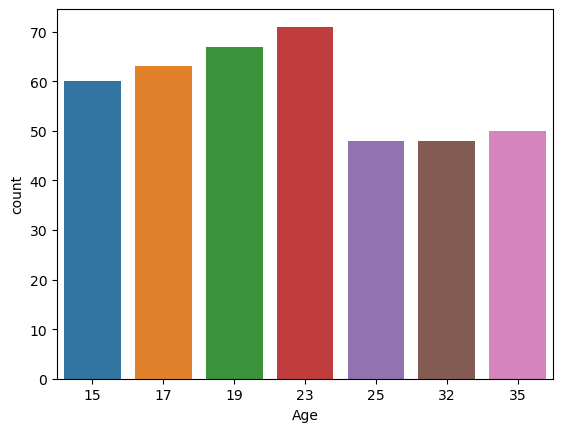

In [42]:
top_ages = data['Age'].value_counts().head(7).index
sns.countplot(data=data[data['Age'].isin(top_ages)], x='Age')

Данная гистограмма показывает, что наиболее "популярный" возраст женщин в подборке - 23 года

<Axes: xlabel='Age', ylabel='count'>

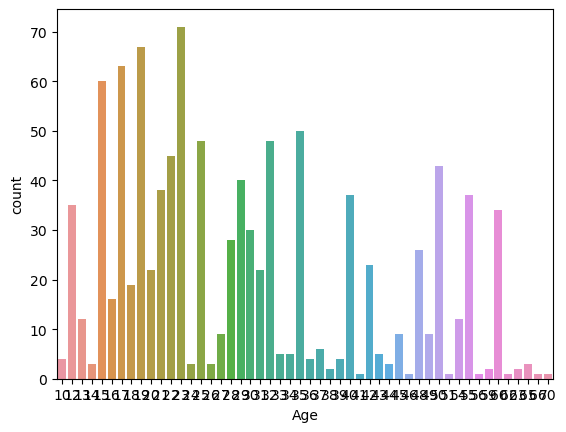

In [43]:
sns.countplot(data=data, x='Age')

Применение Seaborn для попарного распределения признаков

C:\Users\dj-pr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dj-pr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


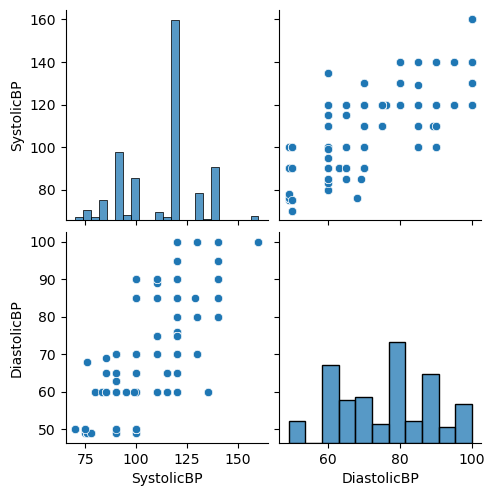

In [44]:
sns.pairplot(data[feats]);

C:\Users\dj-pr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dj-pr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


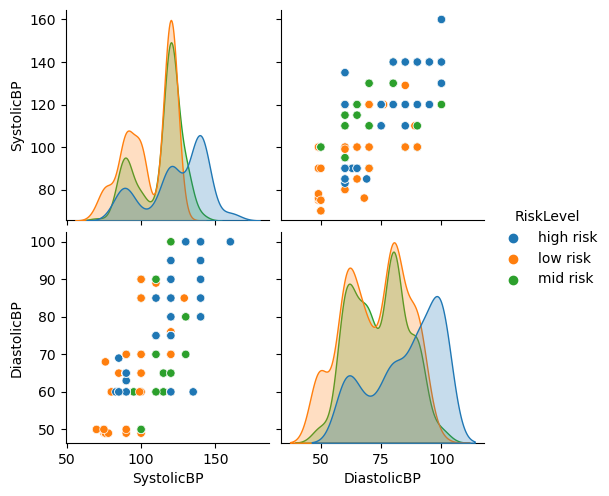

In [46]:
sns.pairplot(data[feats + ['RiskLevel']], hue='RiskLevel');

Из полученных графиков видно, что значения нижнего и верхнего артериального давления находяющиеся в районе 100 и, соответсвенно, 140 мм. ртутного столба - являются крайне небезопасными для беременной женщины.

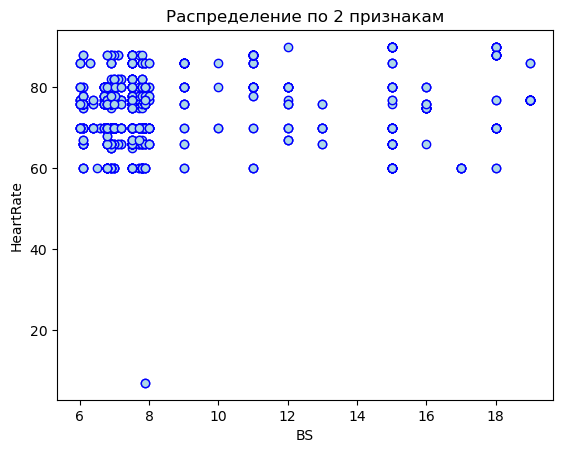

In [57]:
plt.scatter(data['BS'], 
            data['HeartRate'], 
            color='lightblue', edgecolors='blue')
plt.xlabel('BS')
plt.ylabel('HeartRate')
plt.title('Распределение по 2 признакам');

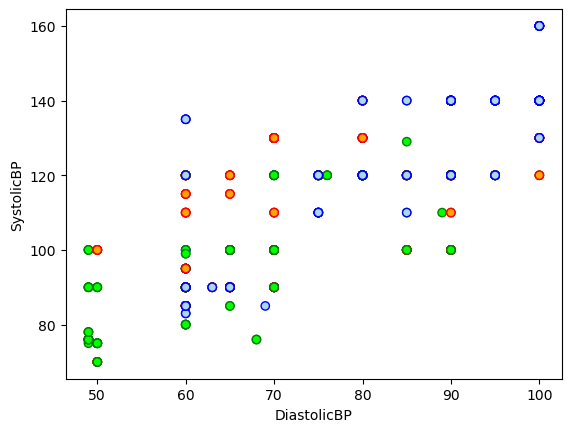

In [54]:
c = data['RiskLevel'].map({'high risk': 'lightblue', 'mid risk': 'orange', 'low risk': 'lime'})
edge_c = data['RiskLevel'].map({'high risk': 'blue', 'mid risk': 'red', 'low risk': 'green'})
# Настройка графика
plt.scatter(data['DiastolicBP'], data['SystolicBP'],
            color=c, edgecolors=edge_c,
           )
plt.xlabel('DiastolicBP')
plt.ylabel('SystolicBP');

Корреляция признаков с помощью corr

<b>Корреля́ция</b> — статистическая взаимосвязь двух или нескольких случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми) . При этом изменения одной или нескольких из этих величин приводят к систематическому изменению другой или других величин. Математической мерой корреляции двух случайных величин служит коэффициент корреляции.

In [58]:
numeric_data = data.select_dtypes(include='number')
numeric_data.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


Визуализируем полученную таблицу данных - используем heatmap

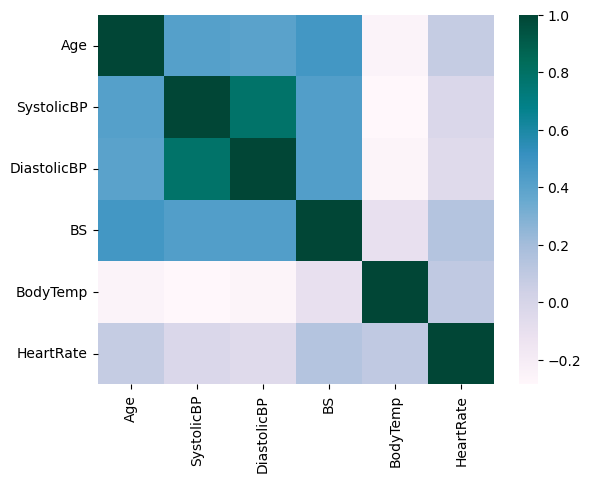

In [59]:
sns.heatmap(numeric_data.corr(), cmap=plt.cm.PuBuGn)

Сильная корреляция наблюдается в парах c верхним и нижним сосудистыми давлениями.
</p>Из таких пар удалим один признак

In [60]:
data_uncorr = numeric_data.drop(feats, axis=1)
data_uncorr.columns

Index(['Age', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')

Перестраиваем heatmap без коррелирующих признаков

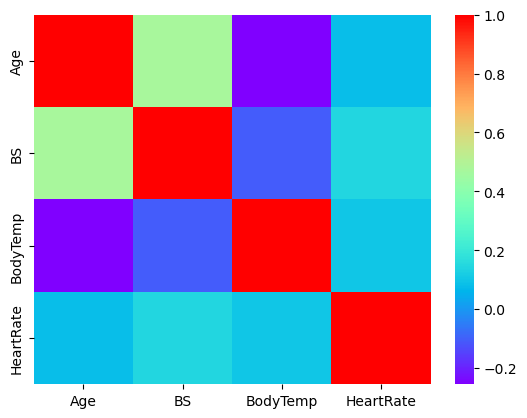

In [61]:
sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);

### Вывод:
В ходе проведенной работы, был проведен набора данных - беременность с высоким риском. Подвыводы были сделаны под каждым графиком.